In [5]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 6.9 MB/s eta 0:00:00


In [6]:
#importing Libraries
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import ipywidgets as widgets
from IPython.display import display
import joblib
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from google.colab import files
uploaded = files.upload()


Saving full_dataset_v3_123.xlsx to full_dataset_v3_123 (1).xlsx


In [8]:
# Sau khi tải lên, bạn có thể đọc file Excel như sau:
import pandas as pd
df = pd.read_excel('full_dataset_v3_123.xlsx')
df.head()

,PhanNhomTuoi,TienCanTuKy,TienSuYKhoa,ChamNoi,CoLap,ChoiCamGiac_VanDong,ChoiKetHop,ChoiGiaVo,HanhViLapLai,KyNangGiaoTiepSom,ChoiLuanPhien,BatChuoc,SaiViec,PhanUngTenGoi,DiNhonChan,ChiTro,ChuYLienKet,TiepXucMat,PhanLoaiBenh,TargetBinary
0,2,0,0,1,1,3,2,0,0,1,1,3,1,3,1,3,2,2,2,1
1,3,1,0,1,1,3,3,0,1,1,0,0,2,0,0,1,1,2,1,1
2,2,0,0,1,0,3,3,2,0,1,0,3,0,1,0,2,1,1,1,1
3,1,0,0,0,0,2,1,1,1,1,0,1,0,1,1,1,2,2,1,1
4,1,0,0,1,0,2,1,1,0,1,0,1,0,1,0,1,2,2,2,1


In [9]:
df = df.drop('TargetBinary', axis=1)

In [ ]:
for i, col in enumerate(df.columns):
    print(f"Vị trí {i}: {col}")

Vị trí 0: PhanNhomTuoi
Vị trí 1: TienCanTuKy
Vị trí 2: TienSuYKhoa
Vị trí 3: ChamNoi
Vị trí 4: CoLap
Vị trí 5: ChoiCamGiac_VanDong
Vị trí 6: ChoiKetHop
Vị trí 7: ChoiGiaVo
Vị trí 8: HanhViLapLai
Vị trí 9: KyNangGiaoTiepSom
Vị trí 10: ChoiLuanPhien
Vị trí 11: BatChuoc
Vị trí 12: SaiViec
Vị trí 13: PhanUngTenGoi
Vị trí 14: DiNhonChan
Vị trí 15: ChiTro
Vị trí 16: ChuYLienKet
Vị trí 17: TiepXucMat
Vị trí 18: PhanLoaiBenh


In [10]:
X = df.iloc[:, 0:17].values
y = df.iloc[:, 18].values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

print(f"Kích thước tập train: {len(X_train)} dòng")
print(f"Kích thước tập test: {len(X_test)} dòng")

Kích thước tập train: 474 dòng
Kích thước tập test: 119 dòng


# PHÂN TÍCH DỮ LIỆU

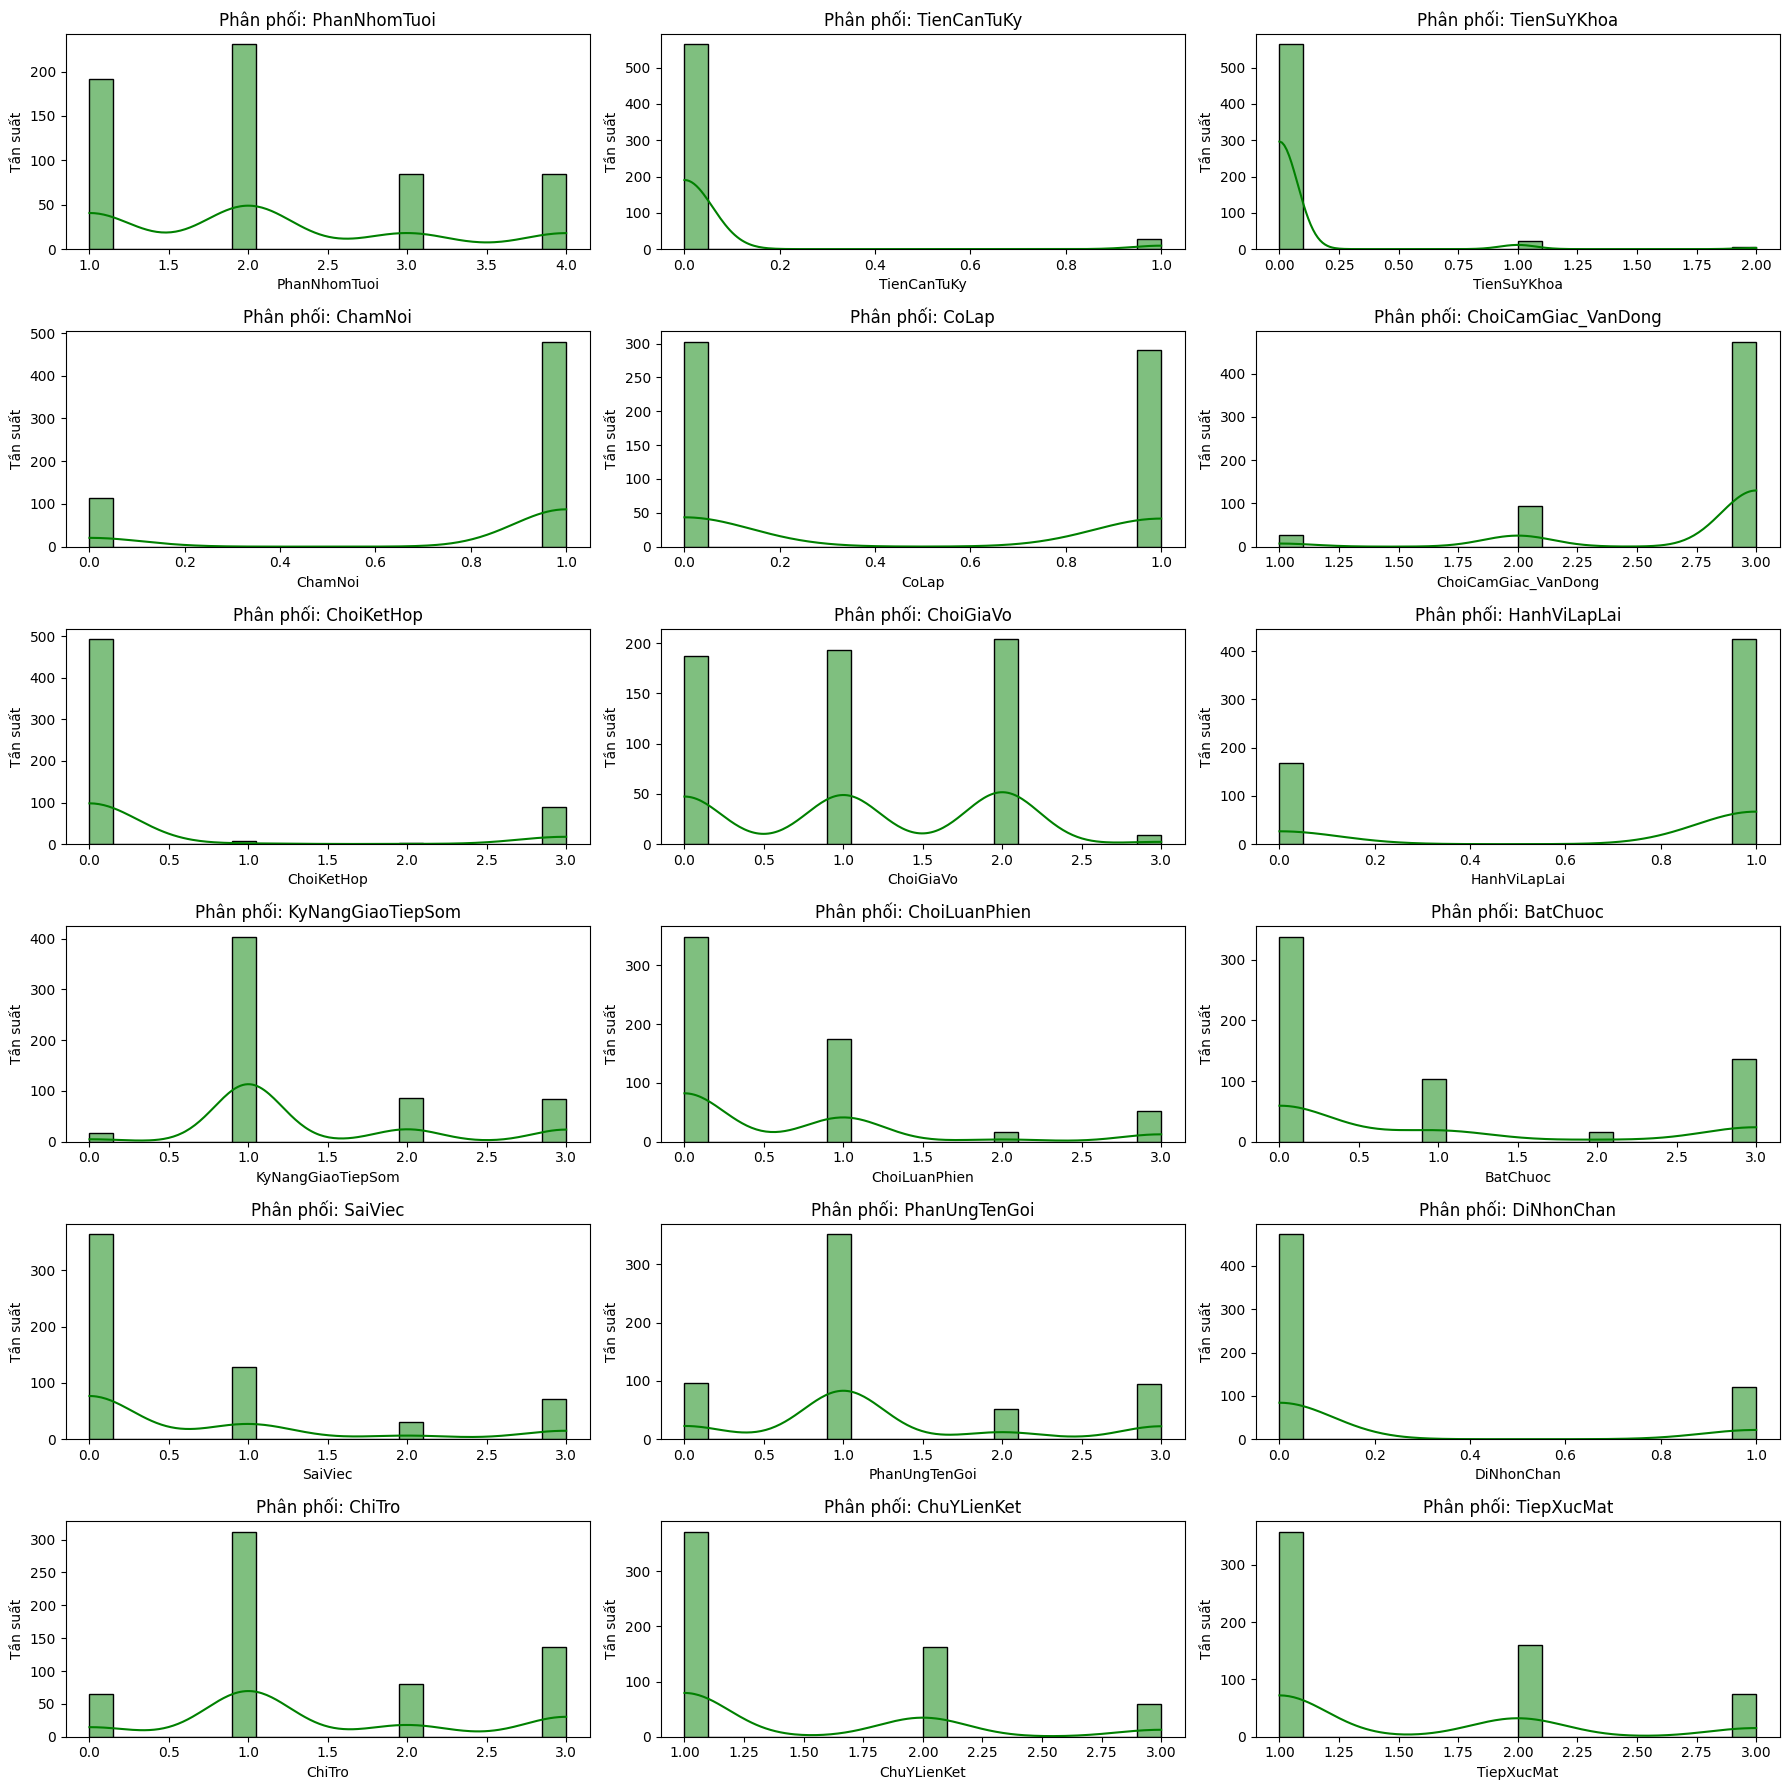

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Giả sử df là DataFrame với ít nhất 18 cột
feature_cols = df.columns[:18]

# Tạo lưới 6 hàng × 3 cột
fig, axes = plt.subplots(6, 3, figsize=(18, 18))
axes = axes.flatten()  # để lặp qua từng biểu đồ dễ hơn

for i, feature in enumerate(feature_cols):
    sns.histplot(df[feature], bins=20, kde=True, color='green', ax=axes[i])
    axes[i].set_title(f'Phân phối: {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Tần suất')

# Tắt các ô dư (nếu có)
for j in range(len(feature_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


<ipython-input-20-e591db214f80>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train_named, palette='viridis')


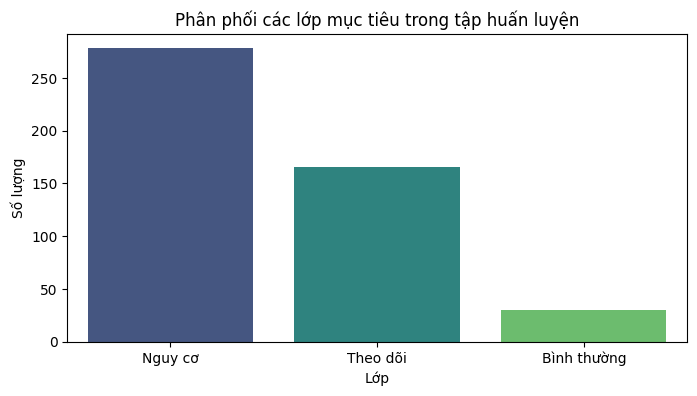

In [20]:
import pandas as pd

# Chuyển y_train từ numpy → Series
y_train_series = pd.Series(y_train)

# Đổi nhãn số thành nhãn rõ nghĩa
y_train_named = y_train_series.map({
    1: "Nguy cơ",
    2: "Theo dõi",
    3: "Bình thường"
})
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(x=y_train_named, palette='viridis')
plt.title('Phân phối các lớp mục tiêu trong tập huấn luyện')
plt.xlabel('Lớp')
plt.ylabel('Số lượng')
plt.show()


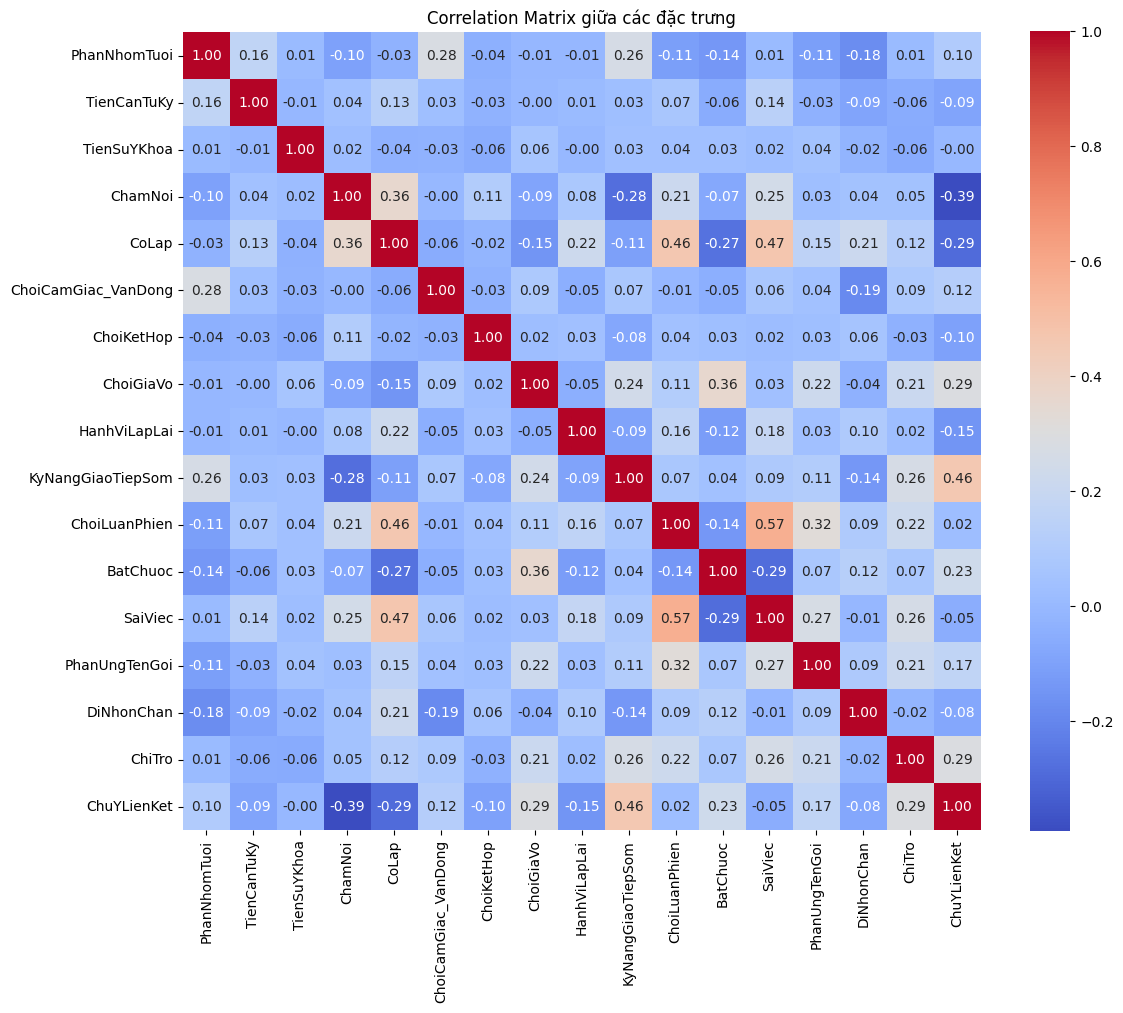

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Giả sử bạn đang dùng pandas DataFrame X_train_df (hoặc tạo lại từ numpy):
X_train_df = pd.DataFrame(X_train, columns=df.columns[:X_train.shape[1]])

# 1. Tính ma trận tương quan
correlation_matrix = X_train_df.corr()

# 2. Vẽ heatmap tương quan
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True,
            xticklabels=correlation_matrix.columns,
            yticklabels=correlation_matrix.columns)

plt.title('Correlation Matrix giữa các đặc trưng')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Dataset có mối liên hệ vừa phải giữa nhiều nhóm hành vi, đặc biệt:

Giao tiếp sớm, chú ý, phản ứng tên gọi, làm theo lệnh → rất quan trọng

Không có cặp nào tương quan quá cao > 0.9 → không bị trùng lặp hoàn toàn

Có thể chọn lọc:

Loại bỏ 1 trong các cặp > 0.6 nếu muốn giảm chiều

Ưu tiên giữ những đặc trưng có tương quan rõ với label (nếu có thể kiểm chứng thêm)

# TRAINING VÀ ĐÁNH GIÁ MODEL

In [43]:
# Create and train the CatBoostClassifier
model = CatBoostClassifier(
    # Best Parameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.01}
    iterations=500, depth=4, learning_rate=0.01,
   loss_function='MultiClass', verbose=False)
model.fit(X_train, y_train)

In [44]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
# printing metrics
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", report)

Accuracy: 0.7815126050420168
Classification Report:
               precision    recall  f1-score   support

           1       0.77      0.91      0.83        64
           2       0.81      0.59      0.68        44
           3       0.75      0.82      0.78        11

    accuracy                           0.78       119
   macro avg       0.78      0.77      0.77       119
weighted avg       0.79      0.78      0.77       119



# CẢI TIẾN MÔ HÌNH

# 1. Tối ưu siêu tham số (hyperparameter tuning)

In [31]:
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV

# Định nghĩa mô hình gốc
cat_model = CatBoostClassifier(loss_function='MultiClass', verbose=False)

# Lưới siêu tham số cần thử
param_grid = {
    'iterations': [200, 500, 1000],
    'depth': [4, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1]
}

# Tạo GridSearch
grid_search = GridSearchCV(
    estimator=cat_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,          # 3-fold cross-validation
    verbose=1,
    n_jobs=-1
)

# Huấn luyện tìm siêu tham số tốt nhất
grid_search.fit(X_train, y_train)

# In kết quả
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy (CV):", grid_search.best_score_)


Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best Parameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.01}
Best Accuracy (CV): 0.7362869198312235


In [32]:
# Huấn luyện lại mô hình tối ưu
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Dự đoán
y_pred = best_model.predict(X_test)

# Đánh giá
from sklearn.metrics import classification_report, accuracy_score

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Test Accuracy: 0.7647058823529411
Classification Report:
               precision    recall  f1-score   support

           1       0.75      0.92      0.83        64
           2       0.85      0.52      0.65        44
           3       0.69      0.82      0.75        11

    accuracy                           0.76       119
   macro avg       0.76      0.75      0.74       119
weighted avg       0.78      0.76      0.75       119



## 1. SMOTE CẢI TIẾN CÂN BẰNG DỮ LIỆU

SMOTE (Synthetic Minority Over-sampling Technique) là một kỹ thuật tăng cường dữ liệu (data augmentation) cho các lớp thiểu số (minority class) trong các bài toán mất cân bằng lớp.

In [45]:
pip install imbalanced-learn

In [47]:
from catboost import CatBoostClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# 1. Áp dụng SMOTE để cân bằng dữ liệu huấn luyện
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# (Tùy chọn) Kiểm tra phân phối lại sau SMOTE
print("Phân phối nhãn sau SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

# 2. Khởi tạo mô hình với tham số tối ưu
model = CatBoostClassifier(
    iterations=500,
    depth=10,
    learning_rate=0.01,
    loss_function='MultiClass',
    verbose=False
)

# 3. Huấn luyện mô hình với dữ liệu đã cân bằng
model.fit(X_train_resampled, y_train_resampled)

# 4. Dự đoán trên tập test ban đầu (không SMOTE)
y_pred = model.predict(X_test)

# 5. Đánh giá mô hình
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Phân phối nhãn sau SMOTE:
1    278
2    278
3    278
Name: count, dtype: int64
Accuracy: 0.7815126050420168
Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.83      0.83        64
           2       0.77      0.68      0.72        44
           3       0.62      0.91      0.74        11

    accuracy                           0.78       119
   macro avg       0.74      0.81      0.76       119
weighted avg       0.79      0.78      0.78       119



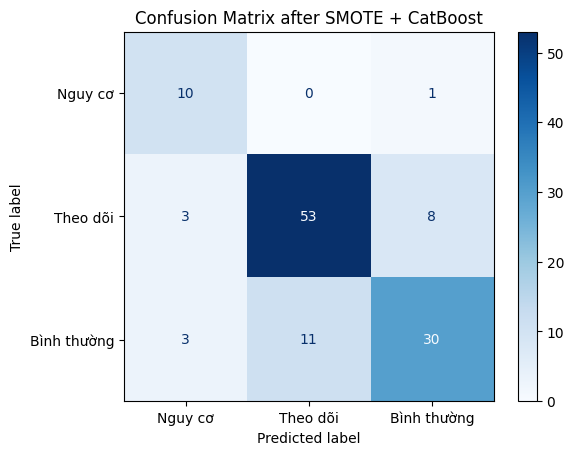

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Nếu cần ánh xạ tên lớp
label_map = {1: "Nguy cơ", 2: "Theo dõi", 3: "Bình thường"}

# Chuyển y_test và y_pred về 1 chiều & ánh xạ tên
y_test_named = pd.Series(y_test.ravel()).map(label_map)
y_pred_named = pd.Series(y_pred.ravel()).map(label_map)

# Vẽ ma trận nhầm lẫn
ConfusionMatrixDisplay.from_predictions(
    y_test_named,
    y_pred_named,
    display_labels=["Nguy cơ", "Theo dõi", "Bình thường"],
    cmap="Blues"
)
plt.title("Confusion Matrix after SMOTE + CatBoost")
plt.show()


# KẾT LUẬN

Đánh giá:
- Lớp "Theo dõi" được dự đoán tốt nhất --> Precision/Recall cao
- "Nguy cơ" ít bị nhầm --> Dự đoán an toàn, không nhầm với "Theo dõi"
- Một số nhầm lẫn giữa "Bình thường" và "Theo dõi" --> Cần cải thiện đặc trưng phân biệt giữa nhóm ít nguy cơ và trung gian

Đề xuất:

- Tính toán Precision / Recall / F1-score từng lớp để định lượng chính xác

- Trích đặc trưng quan trọng (feature importance) từ CatBoost để biết yếu tố nào quyết định

- So sánh với LightGBM trên cùng tập để chọn mô hình tốt nhất

# CẢI TIẾN KẾT HỢP

In [52]:
from sklearn.metrics import classification_report

# Nếu y_test và y_pred là số (1,2,3), có thể ánh xạ về tên lớp
label_map = {1: "Nguy cơ", 2: "Theo dõi", 3: "Bình thường"}

y_test_named = pd.Series(y_test.ravel()).map(label_map)
y_pred_named = pd.Series(y_pred.ravel()).map(label_map)

# In báo cáo phân lớp
print(classification_report(
    y_test_named,
    y_pred_named,
    labels=["Nguy cơ", "Theo dõi", "Bình thường"],
    target_names=["Nguy cơ", "Theo dõi", "Bình thường"]
))


              precision    recall  f1-score   support

     Nguy cơ       0.83      0.83      0.83        64
    Theo dõi       0.77      0.68      0.72        44
 Bình thường       0.62      0.91      0.74        11

    accuracy                           0.78       119
   macro avg       0.74      0.81      0.76       119
weighted avg       0.79      0.78      0.78       119



In [56]:
from collections import Counter
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

# 1. Kiểm tra phân phối gốc
print("Phân phối nhãn ban đầu:", Counter(y_train))

# 2. Áp dụng SMOTE – chỉ oversample các lớp nhỏ hơn lớp chiếm đa số
smote = SMOTE(sampling_strategy='not majority', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 3. Kiểm tra lại sau SMOTE
print("Phân phối nhãn sau SMOTE:", Counter(y_train_resampled))

# 4. Khởi tạo mô hình CatBoost với siêu tham số tối ưu
model = CatBoostClassifier(
    iterations=500,
    depth=4,
    learning_rate=0.01,
    loss_function='MultiClass',
    verbose=False
)

# 5. Huấn luyện mô hình
model.fit(X_train_resampled, y_train_resampled)

# 6. Dự đoán trên tập test ban đầu
y_pred = model.predict(X_test).ravel()

# 7. Ánh xạ nhãn nếu cần
label_map = {1: "Nguy cơ", 2: "Theo dõi", 3: "Bình thường"}
y_test_named = pd.Series(y_test.ravel()).map(label_map)
y_pred_named = pd.Series(y_pred).map(label_map)

# 8. Đánh giá mô hình
print("\n📊 Classification Report:")
print(classification_report(
    y_test_named,
    y_pred_named,
    labels=["Nguy cơ", "Theo dõi", "Bình thường"],
    target_names=["Nguy cơ", "Theo dõi", "Bình thường"]
))


Phân phối nhãn ban đầu: Counter({np.int64(1): 278, np.int64(2): 166, np.int64(3): 30})
Phân phối nhãn sau SMOTE: Counter({np.int64(1): 278, np.int64(2): 278, np.int64(3): 278})

📊 Classification Report:
              precision    recall  f1-score   support

     Nguy cơ       0.80      0.75      0.77        64
    Theo dõi       0.64      0.66      0.65        44
 Bình thường       0.64      0.82      0.72        11

    accuracy                           0.72       119
   macro avg       0.70      0.74      0.72       119
weighted avg       0.73      0.72      0.72       119



In [58]:
# In kết quả
print("Best Accuracy (CV):", grid_search.best_score_)

Best Accuracy (CV): 0.7362869198312235
